In [ ]:
import pandas as pd
df = pd.read_csv("bank_transactions_data_2.csv")
df.head()
#Kim Anita

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
df.info()
#Kim Anita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.isnull().sum()
#Kim Anita

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [ ]:
df.duplicated().sum()
#Kim Anita

0

In [ ]:
df.nunique()
#Kim Anita

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

<Axes: xlabel='TransactionType', ylabel='count'>

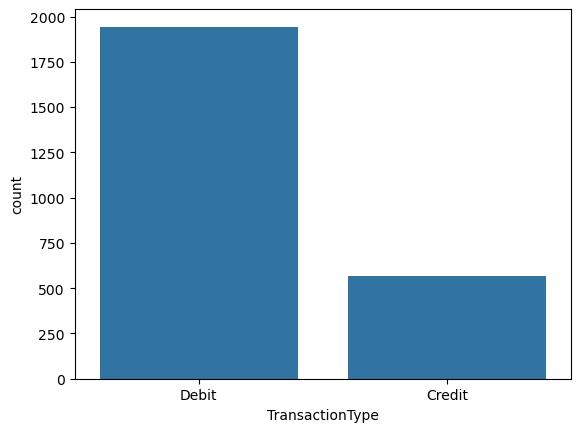

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='TransactionType')
#Kim Anita

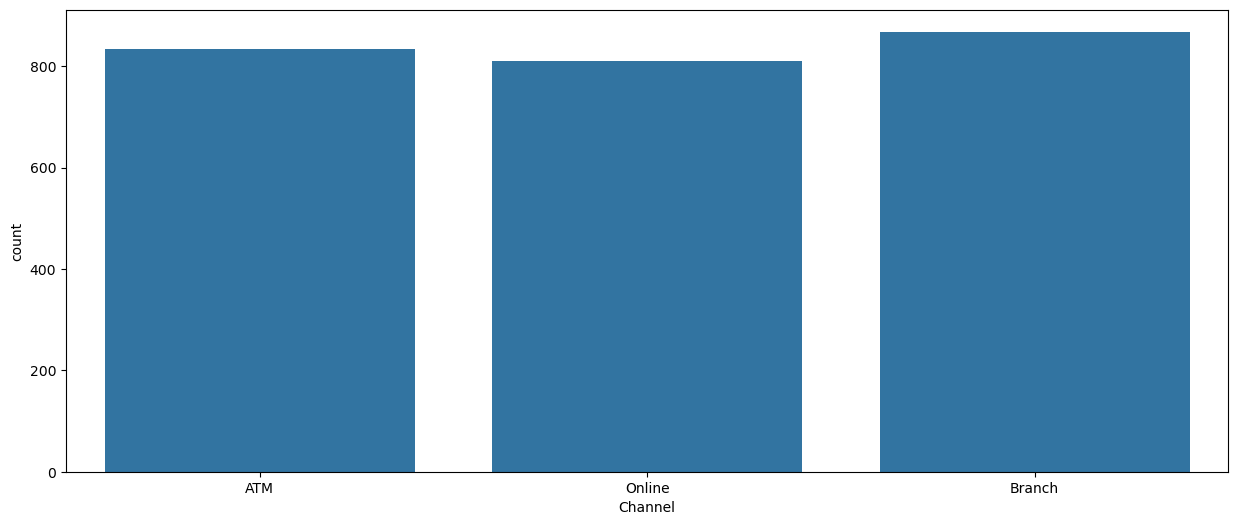

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Channel')
plt.show()
#Kim Anita

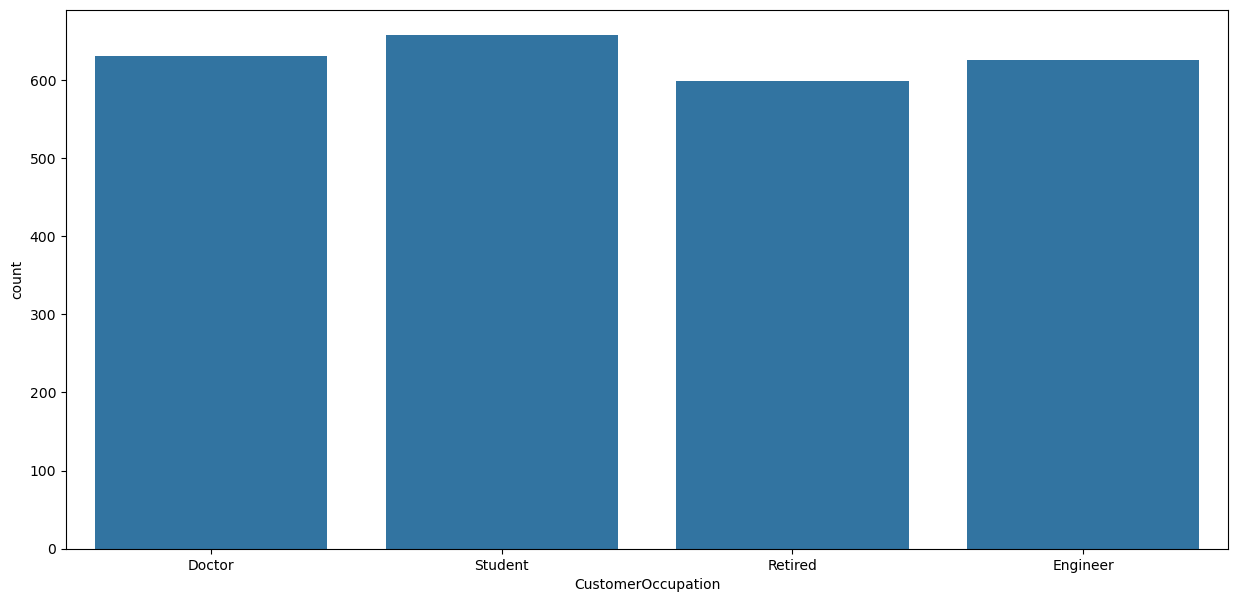

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='CustomerOccupation')
plt.show()
#Kim Anita

<Axes: xlabel='CustomerOccupation', ylabel='AccountBalance'>

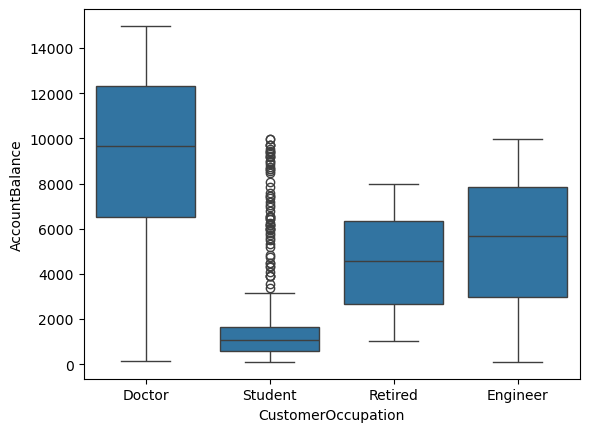

In [ ]:
sns.boxplot(data=df, x='CustomerOccupation', y='AccountBalance')
#Kim Anita

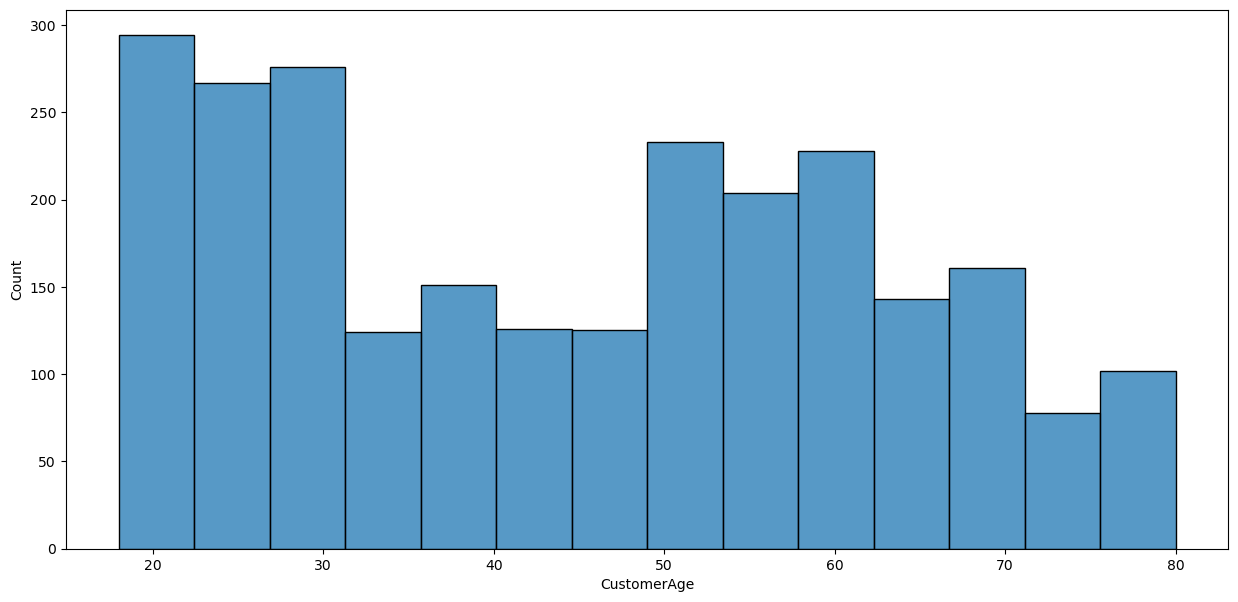

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='CustomerAge')
plt.show()
#Kim Anita

In [ ]:
unique_account_ids = len(df['AccountID'].unique())
print(f"Unique Account IDs we have are : {unique_account_ids}")
print(f"Total number of rows in data : {df.shape[0]}")
#Kim Anita

Unique Account IDs we have are : 495
Total number of rows in data : 2512


In [ ]:
unique_merchant_ids = len(df['MerchantID'].unique())
print(f"Unique Merchant IDs we have are : {unique_merchant_ids}")
print(f"Total number of rows in data : {df.shape[0]}")
#Kim Anita

Unique Merchant IDs we have are : 100
Total number of rows in data : 2512


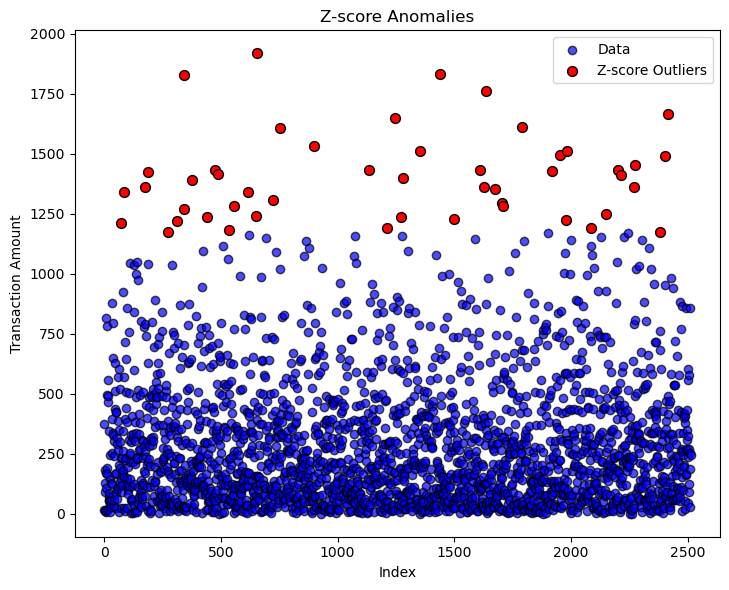

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column = 'TransactionAmount'

mean = df[column].mean()
std = df[column].std()
df['Z_score'] = (df[column] - mean) / std
z_anomalies = df[abs(df['Z_score']) > 3]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df.index, df[column], label="Data", alpha=0.7, color='blue', edgecolors='k')
plt.scatter(z_anomalies.index, z_anomalies[column], color='red', edgecolors='k', label='Z-score Outliers', s=50)
plt.title('Z-score Anomalies')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')
plt.legend()


plt.tight_layout()
plt.show()
#Kim Anita

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np

outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']  # Modify as needed
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

df['AnomalyScore'] = iso_forest.decision_function(X_scaled)
df['IsAnomaly'] = iso_forest.predict(X_scaled)  

df['AnomalyLabel'] = df['IsAnomaly'].map(outlier_mapping)

potential_frauds = df[df['IsAnomaly'] == -1]
print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds.head())
#Kim Anita

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Z_score,AnomalyScore,IsAnomaly,AnomalyLabel
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,-0.173538,-0.075150,-1,Potential Fraud
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,0.338611,-0.014181,-1,Potential Fraud
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53,3.571192,-0.018206,-1,Potential Fraud
91,TX000092,AC00310,223.85,2023-10-02 16:36:10,Debit,Kansas City,D000481,133.223.159.151,M009,ATM,53,Engineer,55,4,2929.91,2024-11-04 08:08:01,-0.252594,-0.029888,-1,Potential Fraud
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,77,Retired,296,1,2042.22,2024-11-04 08:11:44,2.314797,-0.016904,-1,Potential Fraud


/var/folders/w0/1jzn5qxj635bjcpqk97rqppc0000gn/T/ipykernel_19031/336511.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( X_scaled[:, 0], X_scaled[:, 1], c=colors, cmap='coolwarm', alpha=0.7, edgecolors='k', label='Data Points')


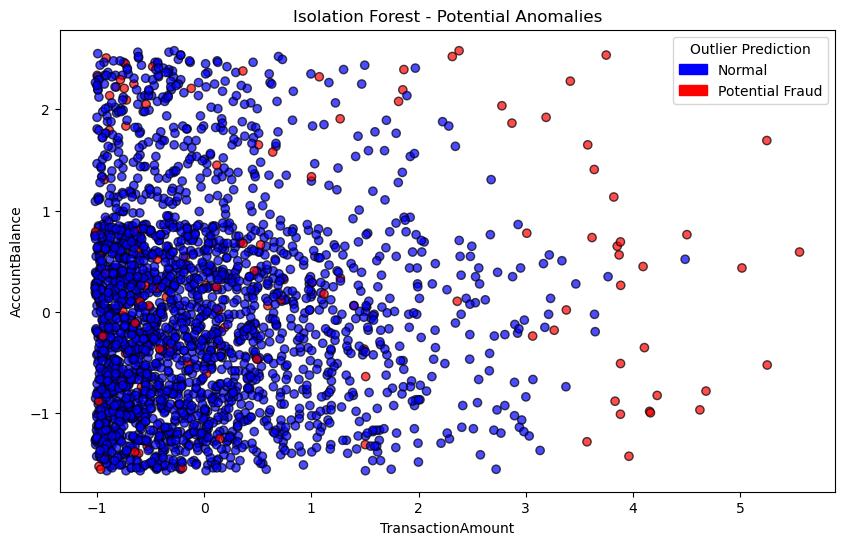

In [ ]:
colors = np.where(df['IsAnomaly'] == -1, 'r', 'b')  

plt.figure(figsize=(10, 6))
plt.scatter( X_scaled[:, 0], X_scaled[:, 1], c=colors, cmap='coolwarm', alpha=0.7, edgecolors='k', label='Data Points')

import matplotlib.patches as mpatches
normal_patch = mpatches.Patch(color='b', label='Normal')
fraud_patch = mpatches.Patch(color='r', label='Potential Fraud')
plt.legend(handles=[normal_patch, fraud_patch], title='Outlier Prediction')

plt.title('Isolation Forest - Potential Anomalies')
plt.xlabel(features[0])  
plt.ylabel(features[2])  
plt.show()
#Kim Anita

In [89]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Create the target variable 'fraud_label' based on IsAnomaly
# df['fraud_label'] = df['IsAnomaly'].apply(lambda x: 1 if x == -1 else 0)

# # Define features and target variable
# X = df[features].copy()  # Features
# y = df['fraud_label']  # Target variable (fraud vs normal)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train Isolation Forest model
# iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
# iso_forest.fit(X_train_scaled)

# # Predict anomalies on the test set
# y_pred = iso_forest.predict(X_test_scaled)
# y_pred = np.where(y_pred == 1, 0, 1)  # Convert output: 1 -> 0 (normal), -1 -> 1 (fraud)

# # Evaluate the model
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Plot confusion matrix
# plt.figure(figsize=(6, 6))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
# plt.title("Confusion Matrix")
# plt.ylabel("Actual")
# plt.xlabel("Predicted")
# plt.show()

# # ROC curve
# y_prob = iso_forest.decision_function(X_test_scaled)  # Anomaly score for ROC
# fpr, tpr, thresholds = roc_curve(y_test, -y_prob)  # Negate the score for better ROC performance (lower scores = more likely to be fraud)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()
